<a href="https://colab.research.google.com/github/nishi1612/CS302-Modelling-and-Simulation/blob/master/CS302_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [0]:
def plot(string,lis):
  time_instant = 99
  temp = lis[:,time_instant]
  mini = np.min(temp)
  maxi = np.max(temp)
  plt.hist(temp,bins=int(abs(mini)+abs(maxi)),density=True)
  plt.xlabel('Postion')
  plt.title(string + 'PDF at 100th time instant for being at xth position')
  plt.ylabel('Probability')
  plt.show()

In [0]:
def info(lis):
  time_instant = 99
  temp = lis[:,time_instant]
  mean_distance = np.mean(temp)
  mean_sq_distance = np.mean(np.square(temp))
  print(mean_distance , mean_sq_distance)
  return mean_distance , mean_sq_distance

In [0]:
def find_diffusion_constant(string , lis):
  var = []
  ans = 0
  count =0
  for i in range(1,time):
    temp = lis[:,i]
    v = np.var(temp)
    var.append(v)
    plt.plot(i,v/(2*i),'bo')
    ans = ans + v/(2*i)
    count = count + 1
  
  plt.title(string + 'Diffusion constant at different time instants')
  plt.ylabel('Value of diffusion constant')
  plt.xlabel('Time instant(t)')
  plt.show()

  plt.plot(np.arange(1,time,1),var)
  plt.title(string + 'Variance at different time instants')
  plt.xlabel('Time instant(t)')
  plt.ylabel('Value of variance')
  plt.show()
  
  print(ans/count)
  return ans/count

In [0]:
runs = 100000
random.seed(2)
lis = []
for r in range(runs):
  init = 0
  time = 100
  k = 0
  walks = np.zeros(time)
  walks[k] = init
  k = k +1
  for i in range(1,time):
    t = random.choice([1,-1])
    init = init + t
    walks[k] = init
    k = k+1
  lis.append(walks)  
  del walks
lis = np.asarray(lis)

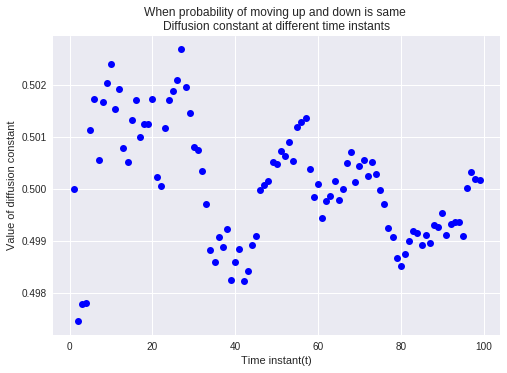

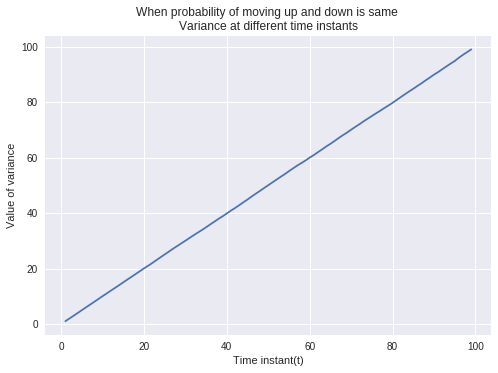

0.500093233842223


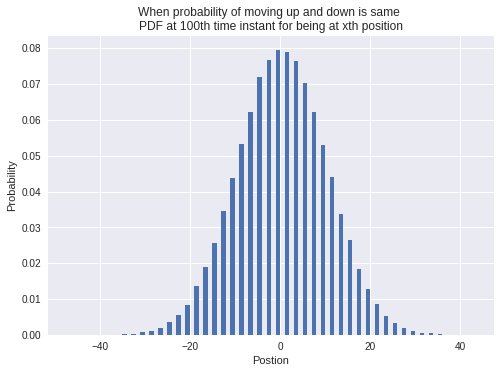

-0.02956 99.03496


In [0]:
find_diffusion_constant("When probability of moving up and down is same \n", lis)
plot("When probability of moving up and down is same \n",lis)
info(lis)
del lis

In [0]:
random.seed(2)
prob = [0.3,0.7]

runs = 100000
lis = []
for r in range(runs):
  init = 0
  time = 100
  k = 0
  walks = np.zeros(time)
  walks[k] = init
  k = k + 1
  rr = np.random.random(len(walks)-1)
  downp = rr < prob[0]
  for i in range(1,time):
      if(downp[i-1] == True) :
        t = -1
      else:
        t = 1
      init = init + t
      walks[k] = init
      k = k+1
  lis.append(walks)
  del walks
lis = np.asarray(lis)

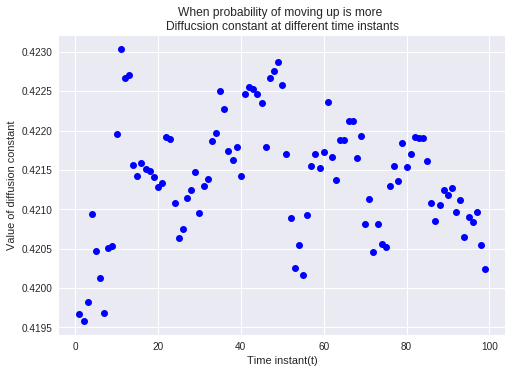

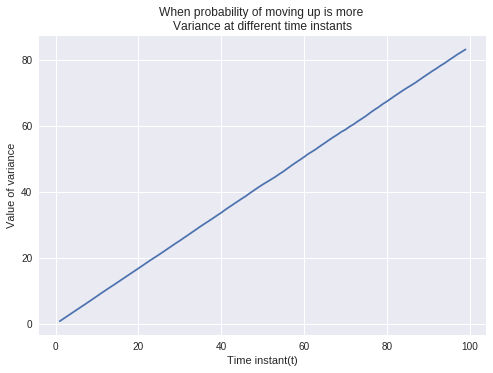

0.4214051590815549


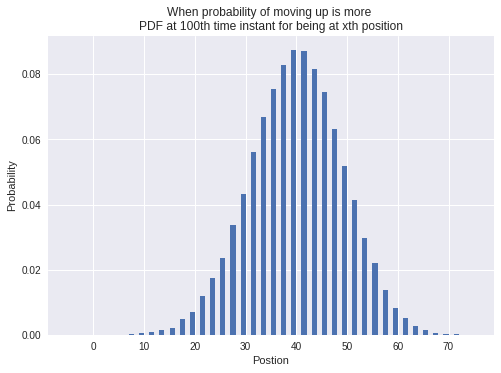

39.5326 1646.0348


In [0]:
find_diffusion_constant("When probability of moving up is more \n", lis)
plot("When probability of moving up is more \n",lis)
info(lis)
del lis

In [0]:
random.seed(2)
prob = [0.7,0.3]

runs = 100000
lis = []
for r in range(runs):
  init = 0
  time = 100
  k = 0
  walks = np.zeros(time)
  walks[k] = init
  k = k + 1
  rr = np.random.random(len(walks)-1)
  downp = rr < prob[0]
  for i in range(1,time):
      if(downp[i-1] == True) :
        t = -1
      else:
        t = 1
      init = init + t
      walks[k] = init
      k = k+1
  lis.append(walks)
  del walks
lis = np.asarray(lis)

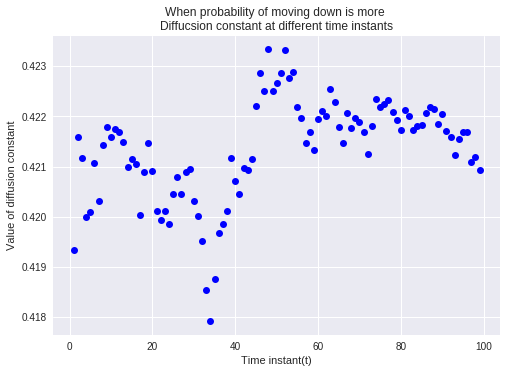

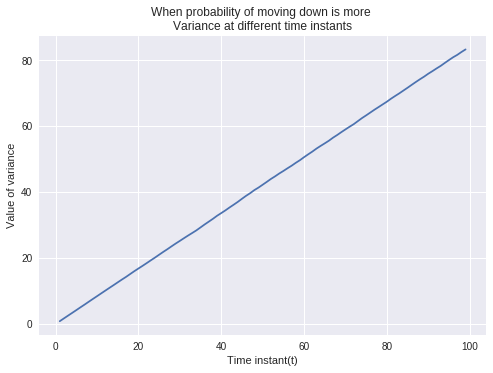

0.42135300838018835


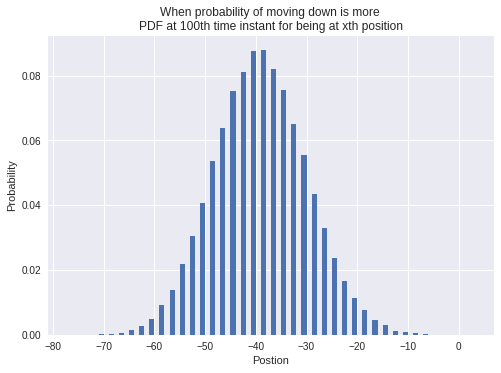

-39.58992 1650.70648


In [0]:
find_diffusion_constant("When probability of moving down is more \n", lis)
plot("When probability of moving down is more \n",lis)
info(lis)
del lis

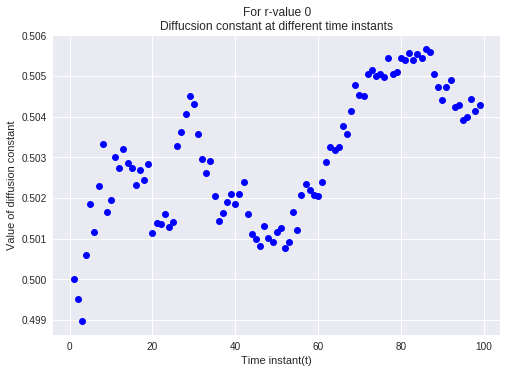

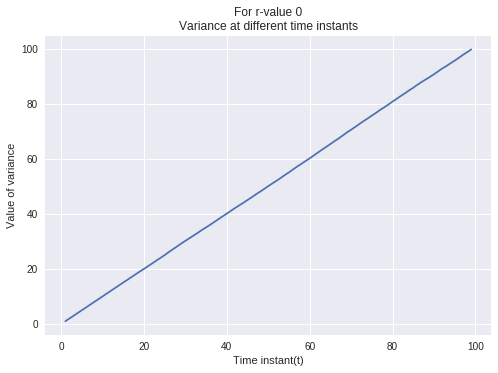

0.5029859982140592


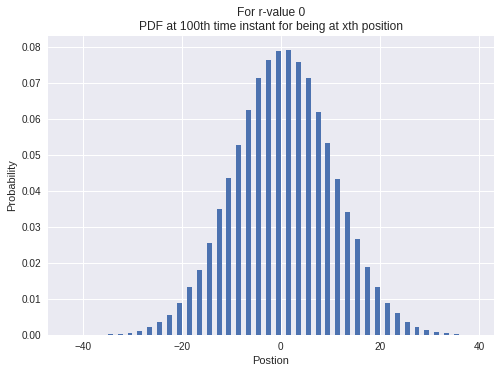

0.03416 99.85152


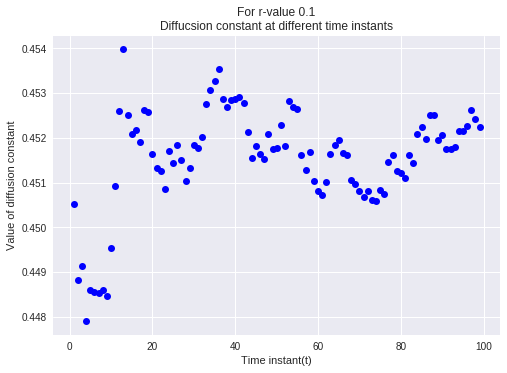

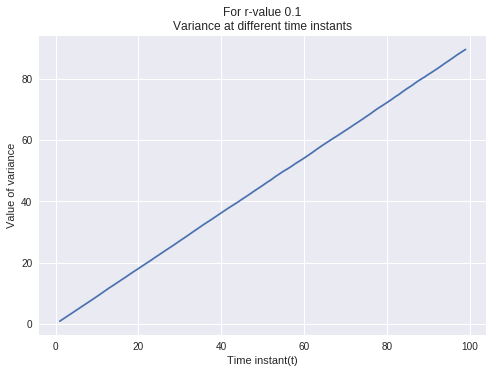

0.4515571923972173


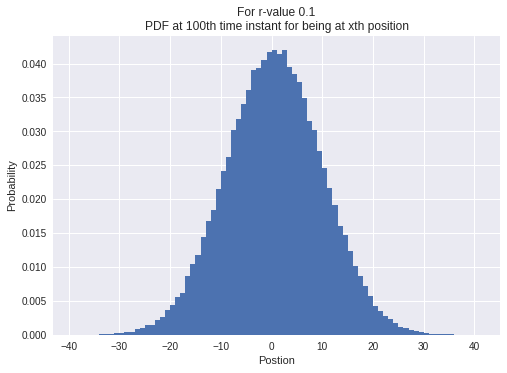

0.05588 89.5481


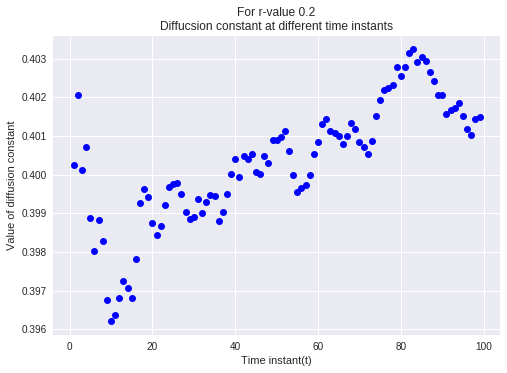

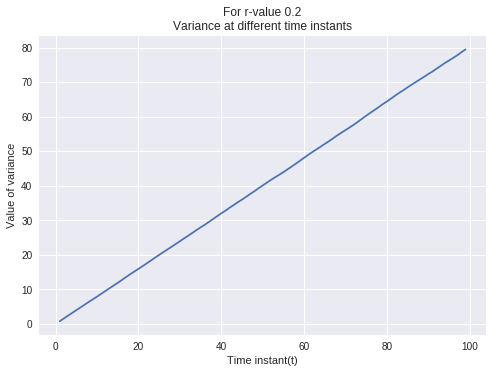

0.4003220533029625


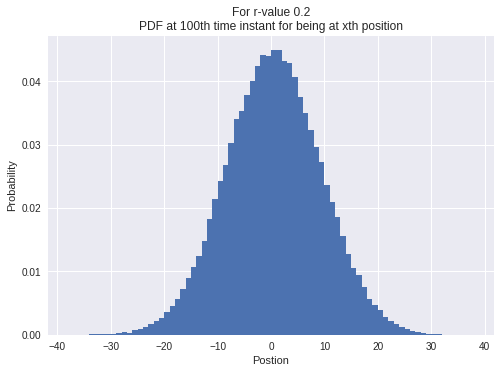

0.00578 79.49402


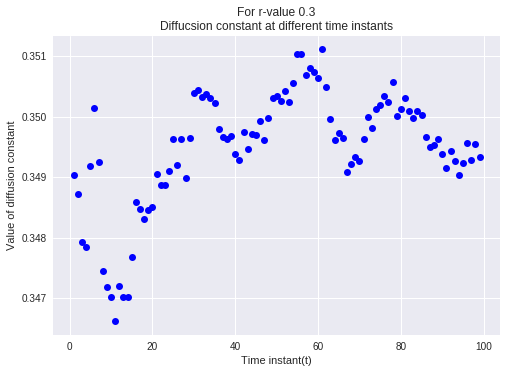

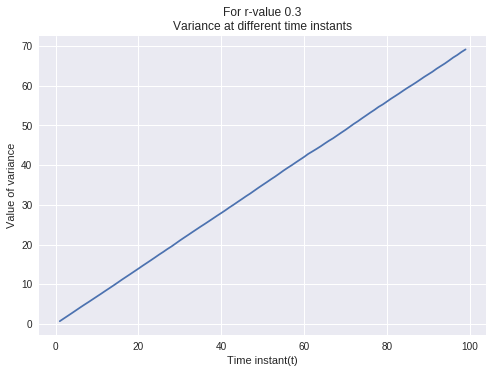

0.34949277959566094


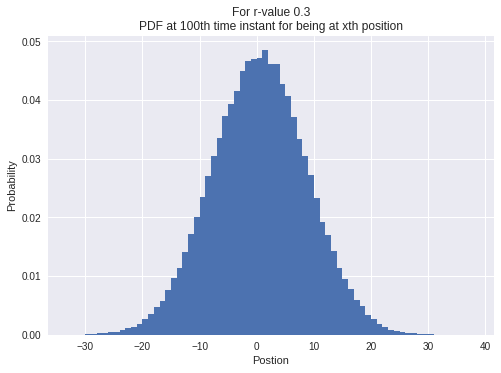

-0.00187 69.16773


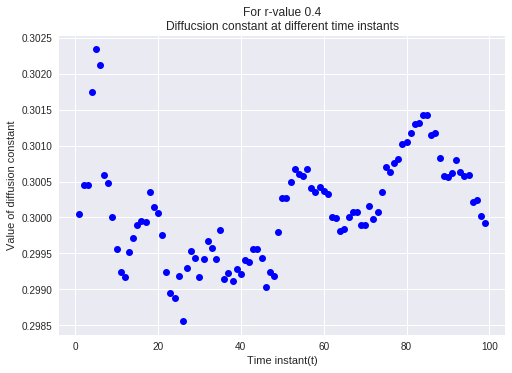

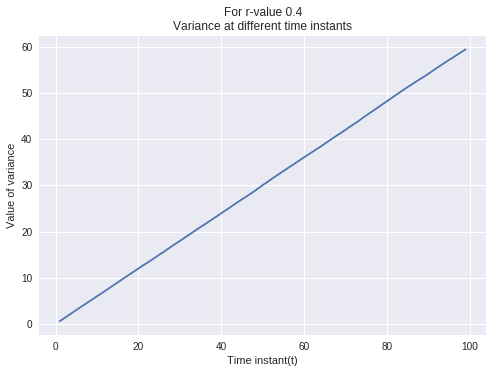

0.30011507499309154


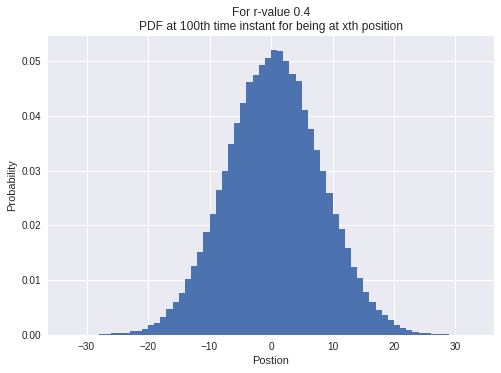

0.01141 59.38377


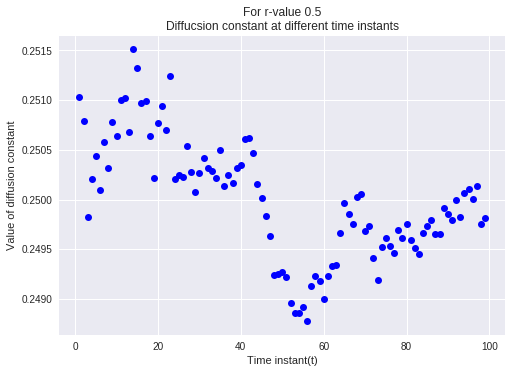

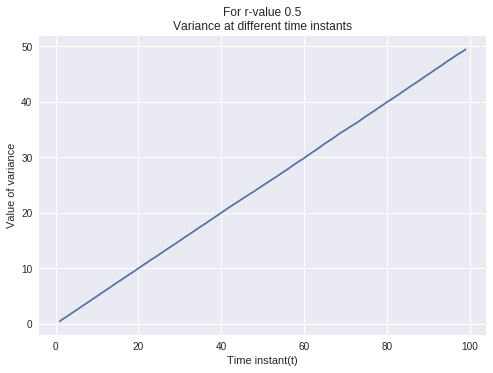

0.24999419389524075


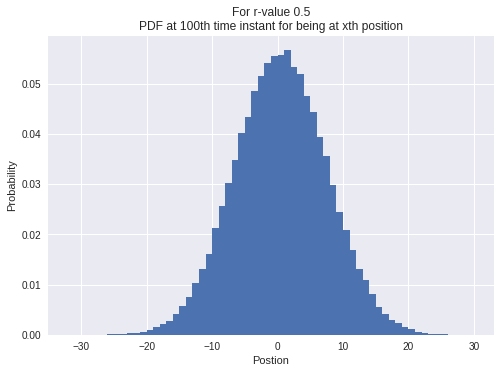

0.00553 49.46229


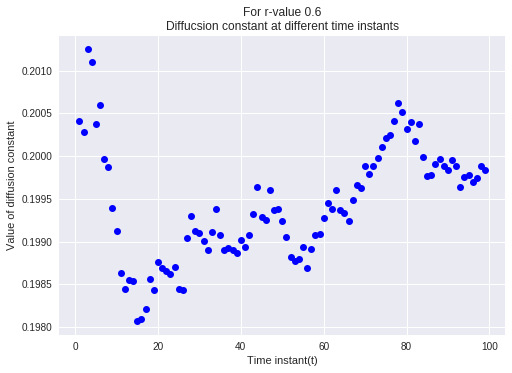

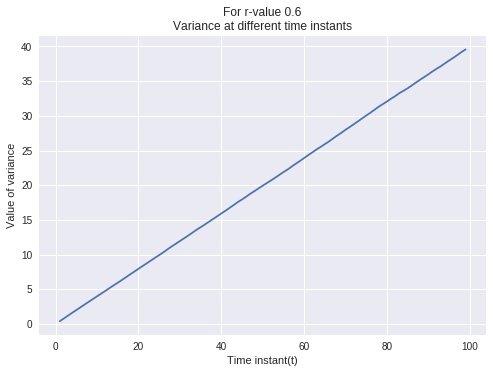

0.19942133911923685


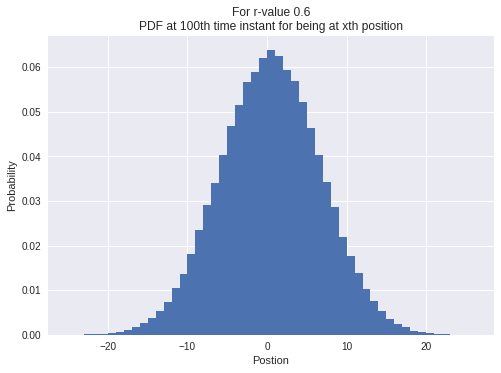

-0.02727 39.56863


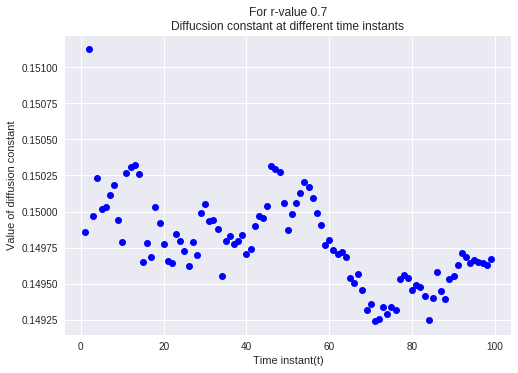

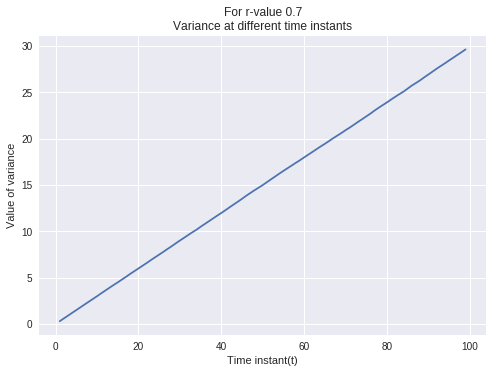

0.14978317583222947


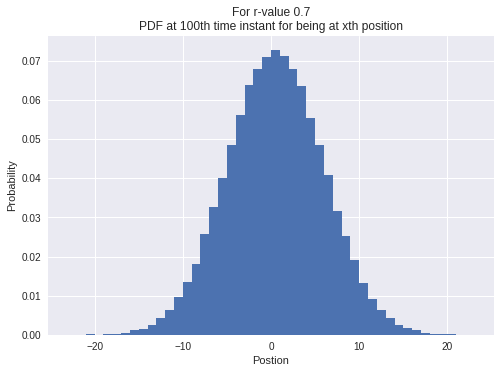

-0.00697 29.63495


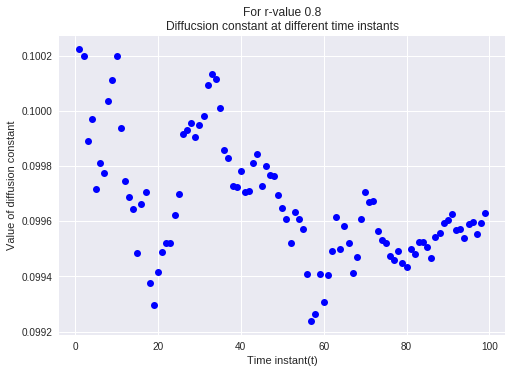

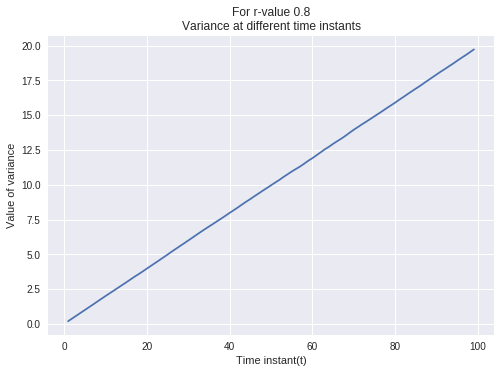

0.0996649105529712


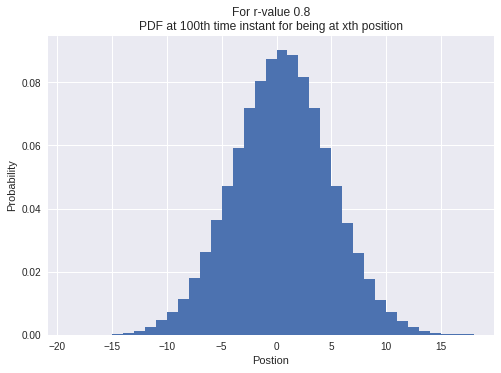

-0.01407 19.72693


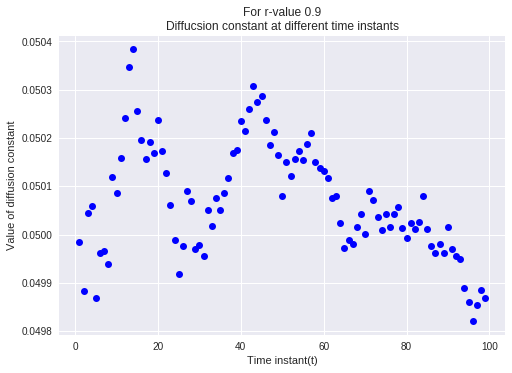

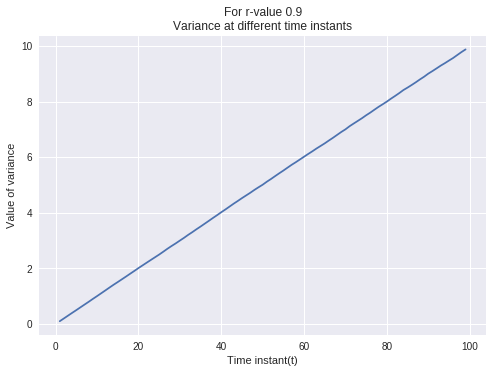

0.05007174363727032


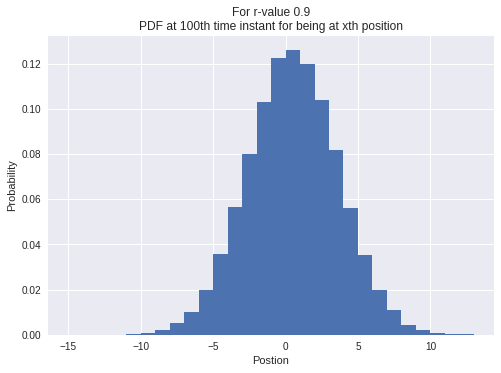

0.00271 9.87399


In [0]:
random.seed(2)
r_vals = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
mean_dists = []
mean_sq_dists = []
diff_consts = []
for r_val in r_vals:
  p = (1 - r_val) / 2
  probs = [p,1-p]
  runs = 100000
  lis = []
  for r in range(runs):
    init = 0
    time = 100
    k = 0
    walks = np.zeros(time)
    walks[k] = init
    k = k + 1
    rr = np.random.random(len(walks)-1)
    for i in range(1,time):
        if(rr[i-1] < probs[0]) :
          t = -1
        elif(rr[i-1]>probs[1]):
          t = 1
        else:
          t = 0
        init = init + t
        walks[k] = init
        k = k+1
    lis.append(walks)
    del walks
  lis = np.asarray(lis)
  d_const = find_diffusion_constant('For r-value ' + str(r_val) + '\n', lis)
  plot('For r-value ' + str(r_val) + '\n',lis)
  a,b = info(lis)
  mean_dists.append(a)
  mean_sq_dists.append(b)
  diff_consts.append(d_const)
  del lis

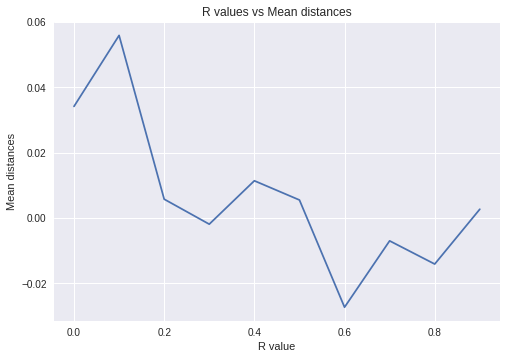

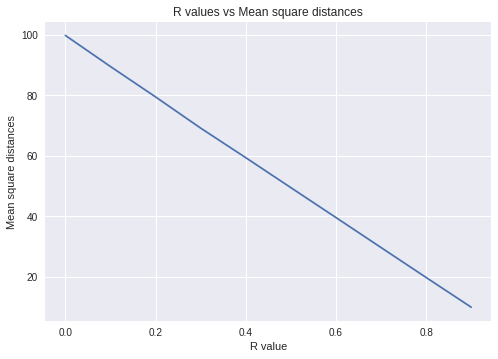

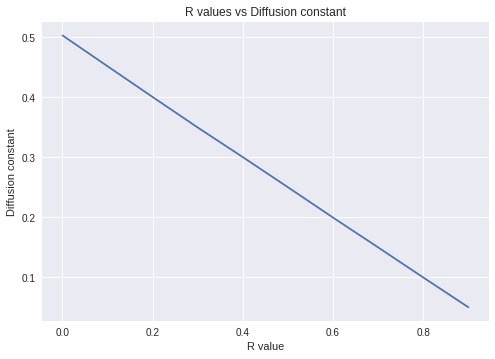

In [0]:
def plt_info():
  plt.xlabel('R value')
  plt.show()

plt.plot(r_vals,mean_dists)
plt.title('R values vs Mean distances')
plt.ylabel('Mean distances')
plt_info()

plt.plot(r_vals,mean_sq_dists)
plt.ylabel('Mean square distances')
plt.title('R values vs Mean square distances')
plt_info()

plt.plot(r_vals,diff_consts)
plt.title('R values vs Diffusion constant')
plt.ylabel('Diffusion constant')
plt_info()

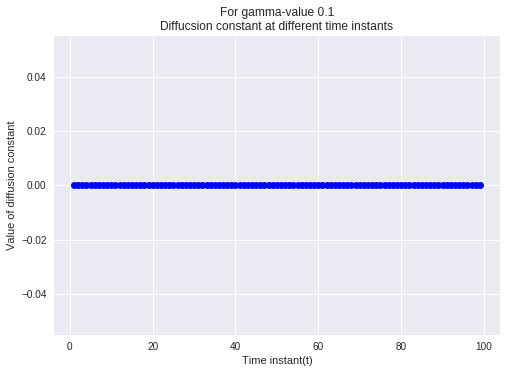

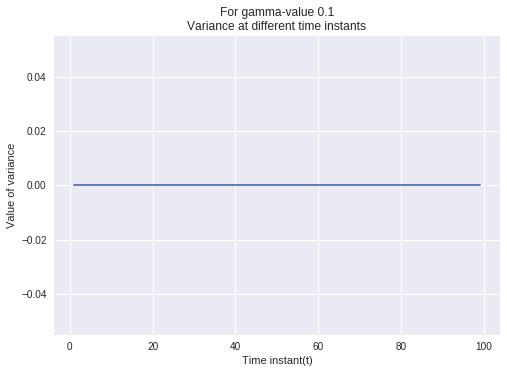

0.0


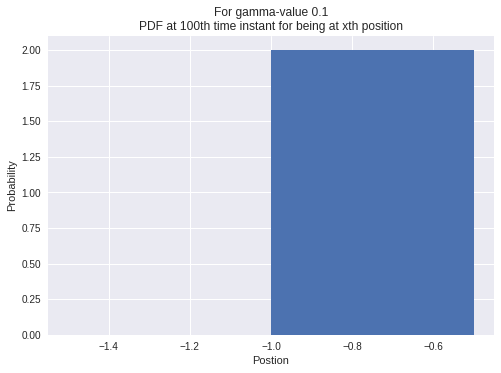

-1.0 1.0


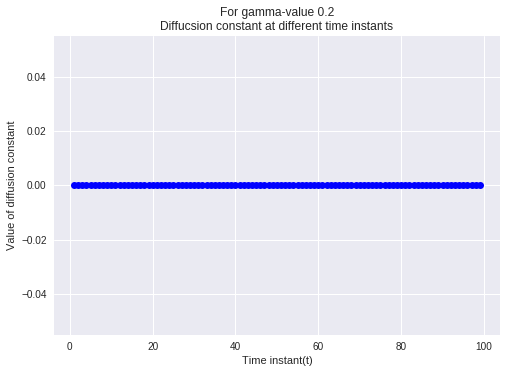

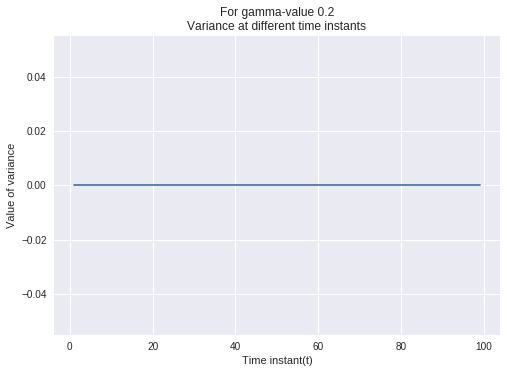

0.0


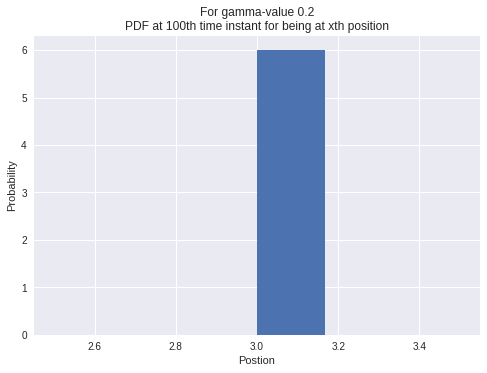

3.0 9.0


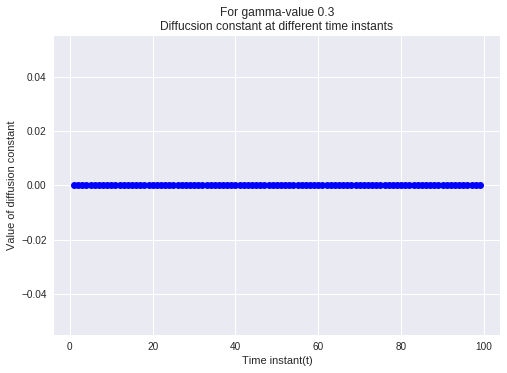

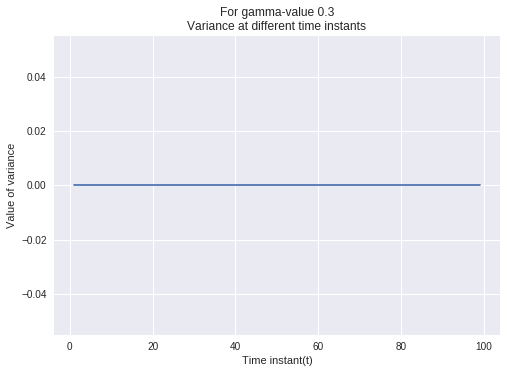

0.0


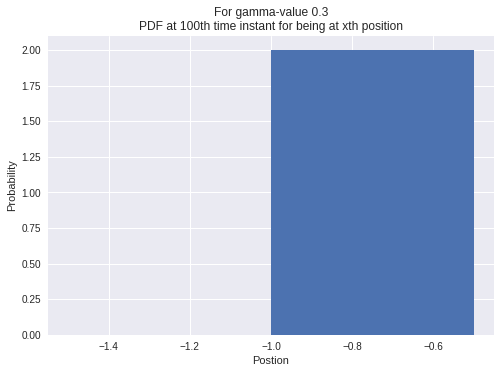

-1.0 1.0


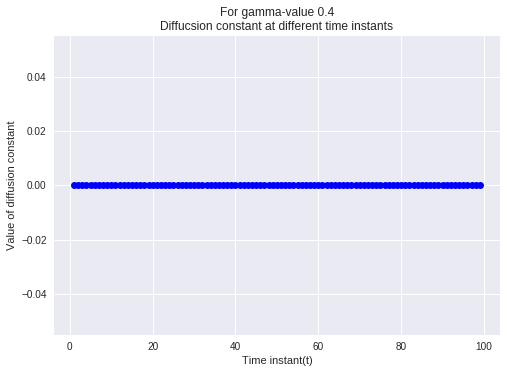

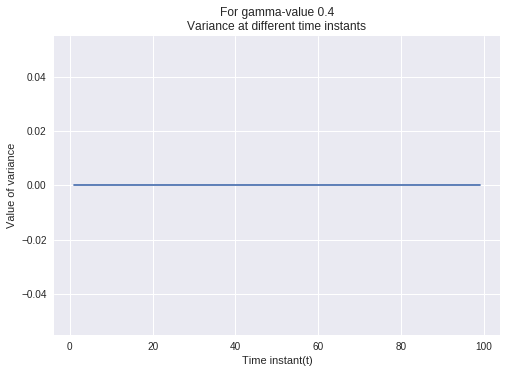

0.0


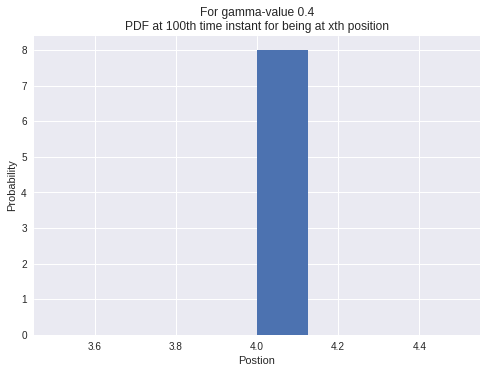

4.0 16.0


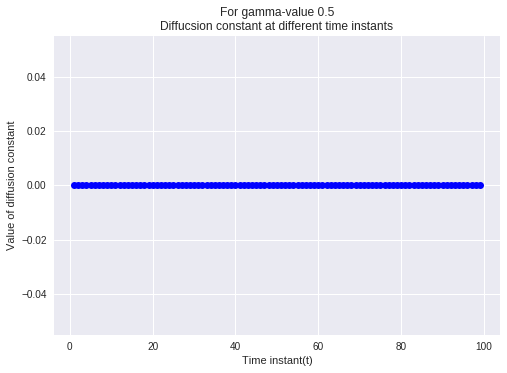

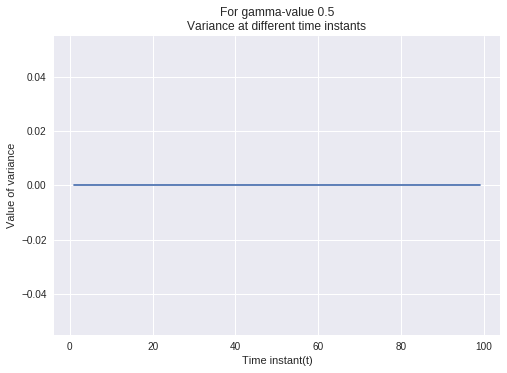

0.0


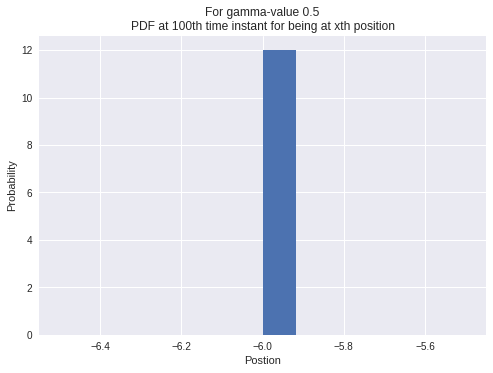

-6.0 36.0


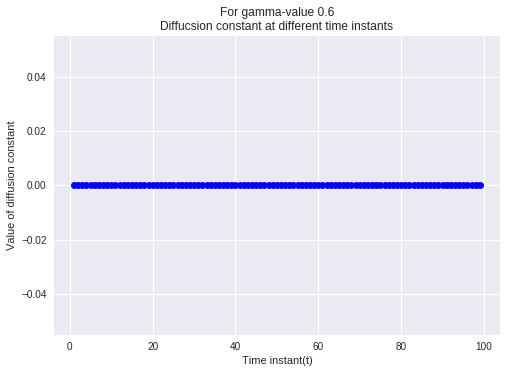

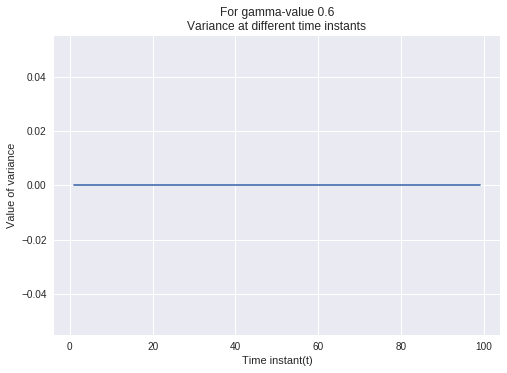

0.0


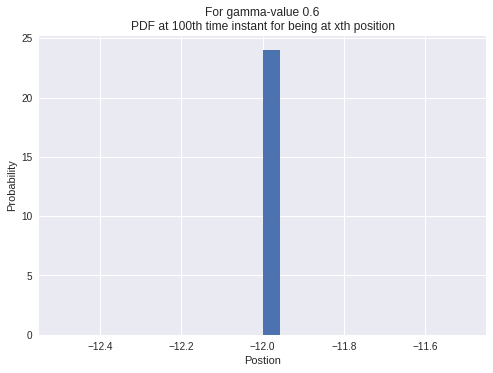

-12.0 144.0


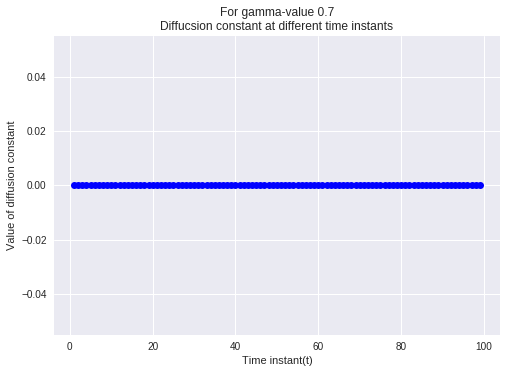

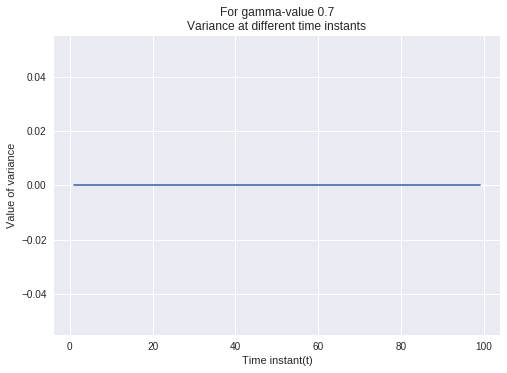

0.0


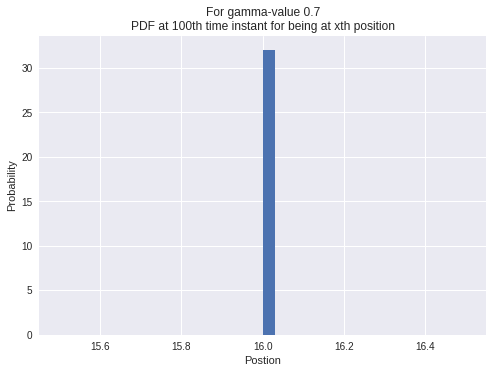

16.0 256.0


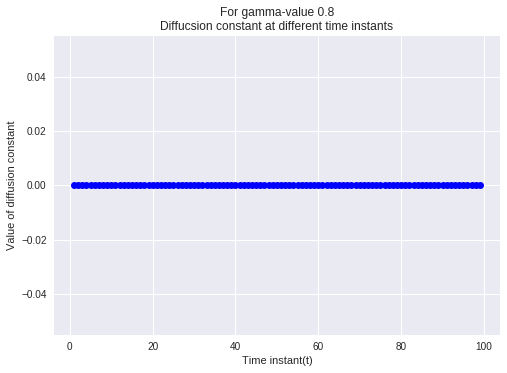

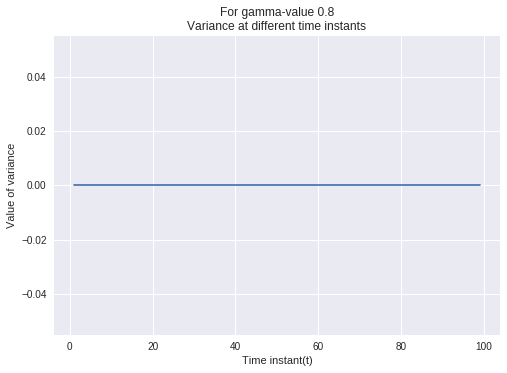

0.0


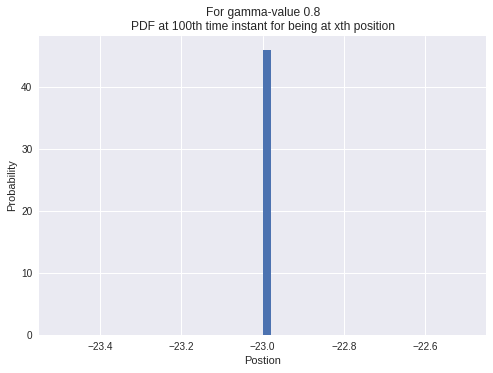

-23.0 529.0


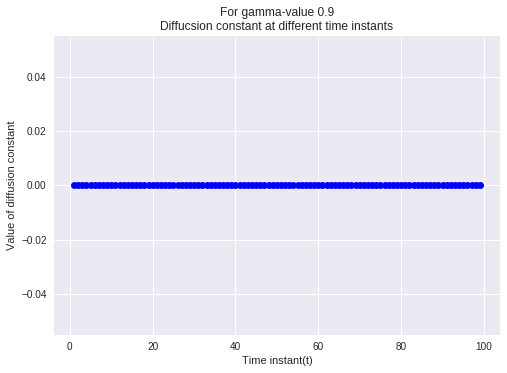

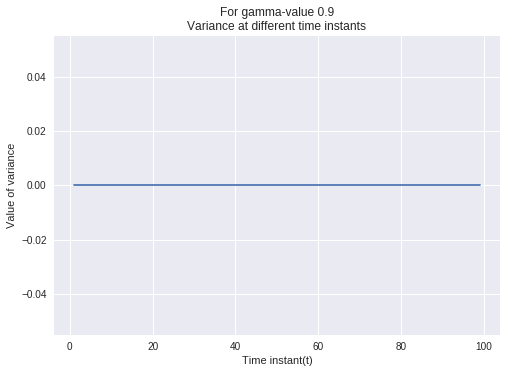

0.0


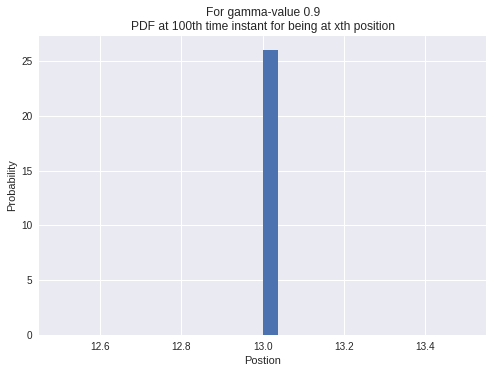

13.0 169.0


In [0]:
random.seed(2)
gamma_vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
mean_dists = []
mean_sq_dists = []
diff_consts = []

for gamma in gamma_vals:
  runs = 1
  lis = []
  for r in range(runs):
    init = 0
    time = 100
    k = 0
    walks = np.zeros(time)  
    walks[k] = init
    k = k + 1
    last_t = 0
    rr = np.random.random(len(walks))
    for i in range(1,time+1):
      if(i==1):
        if(rr[0]<=0.5):
          t = -1
        else:
          t= 1
      else:
        if(rr[i-1] < gamma) :
          t = last_t
        else:
          if(last_t==1):
            t = -1
          else:
            t=1
        init = init + t
        walks[k] = init
        k = k+1
        last_t = t        
      lis.append(walks)
    del walks
  lis = np.asarray(lis)
  d_const = find_diffusion_constant('For gamma-value ' + str(gamma) + '\n', lis)
  plot('For gamma-value ' + str(gamma) + '\n',lis)
  a,b = info(lis)
  mean_dists.append(a)
  mean_sq_dists.append(b)
  diff_consts.append(d_const)
  del lis

R value increase implies Diffusion constant decrease 

R value incraese implies Mean squared disatnce decrease
